In this Notebook, we´re going to examine the discount tendencies of each sub category of the products to see how each one has the most discounts.
We'll start by importing the necesary libraries and the csv file itself and then, we obtain the type of each column with their entries.

In [48]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Not_available = ['Not specified', 'Not Priced']
df = pd.read_csv('GroceryDataset.csv', sep = ',', na_values=Not_available)
df.reset_index(inplace=True)
df

,index,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...
...,...,...,...,...,...,...,...,...,...
1752,1752,Snacks,$23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...
1753,1753,Snacks,$49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags
1754,1754,Snacks,$22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...
1755,1755,Snacks,$17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                1757 non-null   int64 
 1   Sub Category         1757 non-null   object
 2   Price                1754 non-null   object
 3   Discount             1757 non-null   object
 4   Rating               682 non-null    object
 5   Title                1757 non-null   object
 6   Currency             1752 non-null   object
 7   Feature              1739 non-null   object
 8   Product Description  1715 non-null   object
dtypes: int64(1), object(8)
memory usage: 123.7+ KB


Then we obtain the specific values of the discount column       

In [50]:
df['Discount'].unique()


array(['No Discount', 'After $30 OFF', 'After $5 OFF',
       'This item is not returnable.', 'After $20 OFF', 'After $4.50 OFF',
       'After $4 OFF', 'After $2.80 OFF', 'After $8 OFF',
       'After $3.60 OFF', 'After $3 OFF', 'After $1.50 OFF',
       'After $3.30 OFF', 'After $6 OFF', 'After $2.40 OFF',
       'After $2.20 OFF', 'After $12 OFF', 'After $3.10 OFF',
       'After $5.60 OFF', 'After $2.70 OFF', 'After $10 OFF',
       'After $9.30 OFF', 'After $50 OFF', 'After $2.50 OFF',
       'After $70 OFF', 'After $60 OFF', 'After $40 - $80 OFF',
       'After $40 - $70 OFF', 'After $40 OFF', 'After $80 OFF', '.',
       'After $3.50 OFF', 'Limit 1 Per Member', 'Limit 5 Per Member',
       'After $6.50 OFF', 'After $3.80 OFF', 'After $2.60 OFF',
       'After $7 OFF',
       'Costco Members Receive an Additional $5 OFF Caramel Peanut Protein Bars with FitCrunch through Costco Next',
       'After $4.10 OFF', 'After $2 OFF', 'After $2.30 OFF'], dtype=object)

# Exploratory Data Analysis

## 1. Data Cleansing
Before going in further, we need to check the missing values of the dataset.

In [51]:
df.isna().sum().sort_values(ascending = False)

Rating                 1075
Product Description      42
Feature                  18
Currency                  5
Price                     3
index                     0
Sub Category              0
Discount                  0
Title                     0
dtype: int64

As we can see, there are some missing values, especially in the rating column, in that case, we are deleting the column itself since the percentage of missing data equals aprox 61.2%

In [52]:
df.drop(columns=['Rating'], inplace=True)
df

,index,Sub Category,Price,Discount,Title,Currency,Feature,Product Description
0,0,Bakery & Desserts,$56.99,No Discount,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,1,Bakery & Desserts,$159.99,No Discount,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,2,Bakery & Desserts,$44.99,No Discount,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,3,Bakery & Desserts,$39.99,No Discount,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,4,Bakery & Desserts,$59.99,No Discount,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...
...,...,...,...,...,...,...,...,...
1752,1752,Snacks,$23.99,No Discount,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...
1753,1753,Snacks,$49.99,No Discount,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags
1754,1754,Snacks,$22.99,No Discount,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...
1755,1755,Snacks,$17.49,No Discount,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...


As for the rest of the data we are doing the following:
- The Currency column is going to be filled with the same value
- The Price column is going to be transformed into a numeric column type so we can then fill the remaining values with the mean
- the Product Description and Feature columns are getting removed due to them being unnecesary with the current analysis

In [53]:
df['Currency'].fillna('$', inplace = True)

df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].str.replace(r'through-\d+\.\d+', '', regex=True)
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'] = df['Price'].fillna(df['Price'].mean())

df.drop(columns=['Product Description', 'Feature'], inplace=True)
df.isna().sum()


index           0
Sub Category    0
Price           0
Discount        0
Title           0
Currency        0
dtype: int64

In [54]:
df.dtypes

index             int64
Sub Category     object
Price           float64
Discount         object
Title            object
Currency         object
dtype: object

After cleaning up the dataset, we start to identify the subcategories of the products themselves

In [55]:
df['Sub Category'].unique()

array(['Bakery & Desserts', 'Beverages & Water', 'Breakfast', 'Candy',
       'Cleaning Supplies', 'Coffee', 'Deli', 'Floral', 'Gift Baskets',
       'Household', 'Kirkland Signature Grocery',
       'Laundry Detergent & Supplies', 'Meat & Seafood', 'Organic',
       'Pantry & Dry Goods', 'Paper & Plastic Products', 'Poultry',
       'Seafood', 'Snacks'], dtype=object)

In [56]:
df.groupby('Sub Category').size().sort_values(ascending = False)

Sub Category
Snacks                          293
Pantry & Dry Goods              171
Candy                           154
Beverages & Water               148
Meat & Seafood                  144
Kirkland Signature Grocery      122
Coffee                           95
Cleaning Supplies                94
Gift Baskets                     89
Paper & Plastic Products         88
Household                        81
Floral                           75
Seafood                          47
Laundry Detergent & Supplies     39
Organic                          33
Bakery & Desserts                33
Deli                             21
Breakfast                        21
Poultry                           9
dtype: int64

After detecting the subcategories, in which there are 19 subcategories, we are going to start the visualization

## 2. Visualization

In order to visualize the discounts of each subcategory, we are going to use a boxplot to see the distribution of each subcategory by choosing the products in which there's already a discount then we check if there's a null category.

In [57]:
df_discounted = df[df['Discount'] != 'No Discount']
df_discounted
df_discounted['Discount'].unique()

array(['After $30 OFF', 'After $5 OFF', 'This item is not returnable.',
       'After $20 OFF', 'After $4.50 OFF', 'After $4 OFF',
       'After $2.80 OFF', 'After $8 OFF', 'After $3.60 OFF',
       'After $3 OFF', 'After $1.50 OFF', 'After $3.30 OFF',
       'After $6 OFF', 'After $2.40 OFF', 'After $2.20 OFF',
       'After $12 OFF', 'After $3.10 OFF', 'After $5.60 OFF',
       'After $2.70 OFF', 'After $10 OFF', 'After $9.30 OFF',
       'After $50 OFF', 'After $2.50 OFF', 'After $70 OFF',
       'After $60 OFF', 'After $40 - $80 OFF', 'After $40 - $70 OFF',
       'After $40 OFF', 'After $80 OFF', '.', 'After $3.50 OFF',
       'Limit 1 Per Member', 'Limit 5 Per Member', 'After $6.50 OFF',
       'After $3.80 OFF', 'After $2.60 OFF', 'After $7 OFF',
       'Costco Members Receive an Additional $5 OFF Caramel Peanut Protein Bars with FitCrunch through Costco Next',
       'After $4.10 OFF', 'After $2 OFF', 'After $2.30 OFF'], dtype=object)

In [58]:
df_discounted = df_discounted[df_discounted['Discount'] != '.']
df_discounted

,index,Sub Category,Price,Discount,Title,Currency
33,33,Beverages & Water,99.99,After $30 OFF,Pulp & Press Organic Cold-Pressed Wellness Sho...,$
36,36,Beverages & Water,20.99,After $5 OFF,"Alani Nu Energy Drink, Variety Pack, 12 fl oz,...",$
37,37,Beverages & Water,19.99,After $5 OFF,"Poppi Prebiotic Soda, Variety Pack, 12 fl oz, ...",$
38,38,Beverages & Water,19.99,After $5 OFF,"Poppi Prebiotic Soda, Variety Pack, 12 fl oz, ...",$
39,39,Beverages & Water,439.99,This item is not returnable.,"Kirkland Signature Bottled Water 16.9 fl oz, 4...",$
...,...,...,...,...,...,...
1648,1648,Snacks,14.99,After $3 OFF,"Wonderful In-Shell Pistachio Nuts, 1.5 oz, 24-...",$
1651,1651,Snacks,10.49,After $2.50 OFF,"Kar's Trail Mix, Sweet 'N Salty, 2 oz, 24-count",$
1662,1662,Snacks,11.89,After $3.10 OFF,"Oreo Chocolate Sandwich Cookies, 2.4 oz, 30-count",$
1700,1700,Snacks,11.49,After $3.50 OFF,"Second Nature Trail Mix, Wholesome Medley, 1.5...",$


After obtaining the discounted products, we group the products by subcategory and then, we obtain the ones with the most amount of discounts

<Axes: xlabel='Sub Category'>

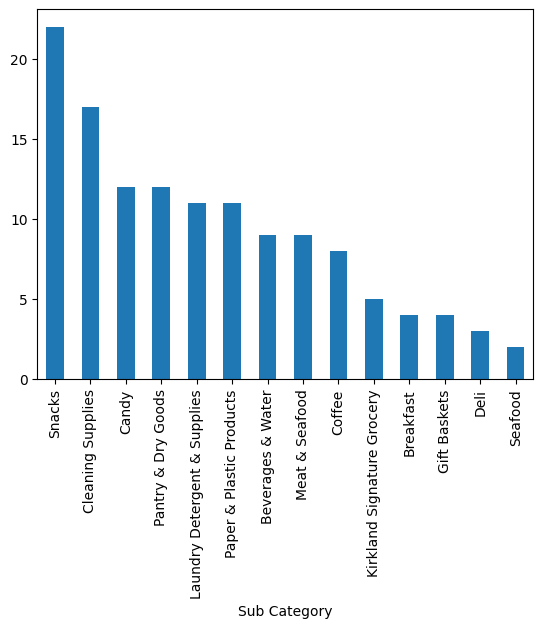

In [59]:
df_discounted_grouped = df_discounted.groupby('Sub Category').size().sort_values(ascending = False)
df_discounted_grouped.plot(kind='bar')

array(['Beverages & Water', 'Breakfast', 'Candy', 'Cleaning Supplies',
       'Coffee', 'Deli', 'Gift Baskets', 'Kirkland Signature Grocery',
       'Laundry Detergent & Supplies', 'Meat & Seafood',
       'Pantry & Dry Goods', 'Paper & Plastic Products', 'Seafood',
       'Snacks'], dtype=object)

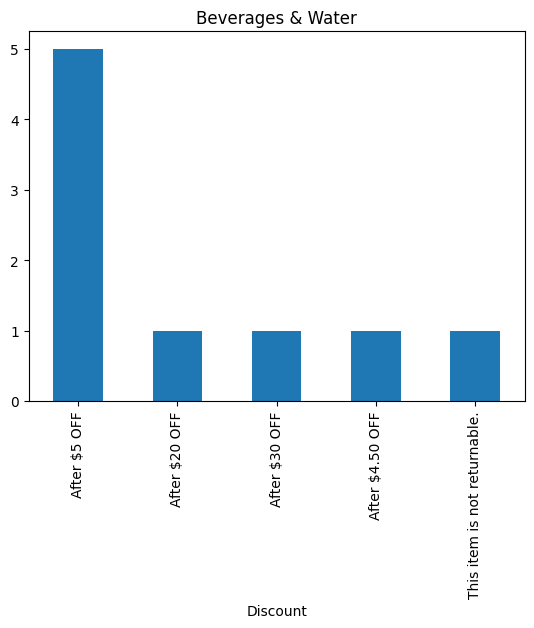

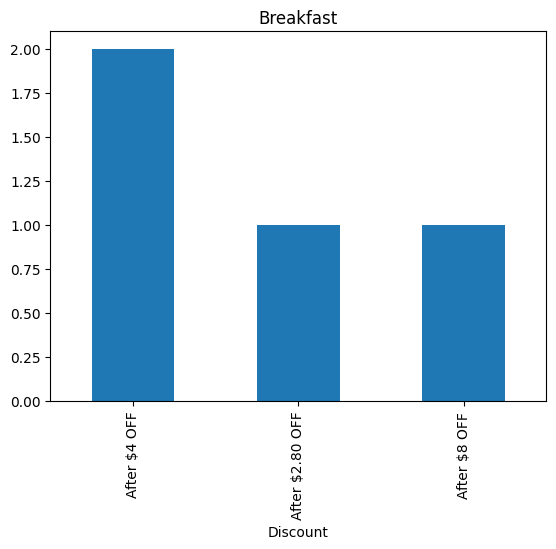

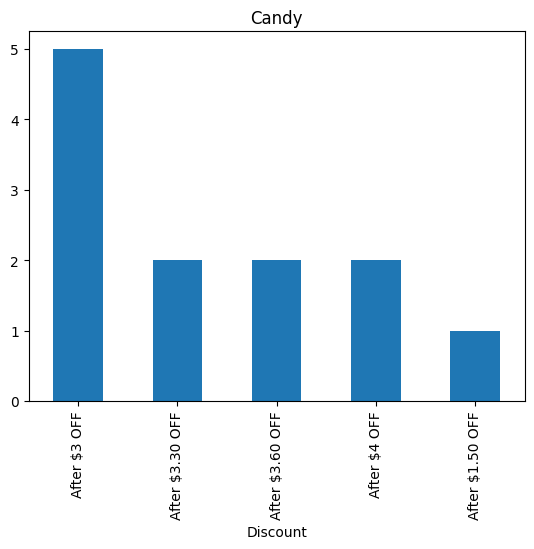

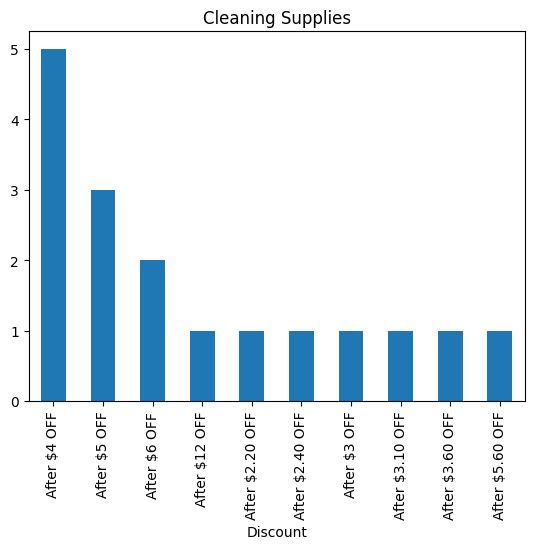

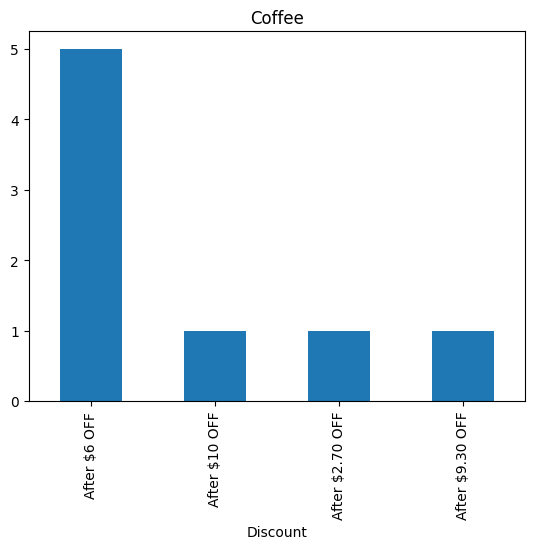

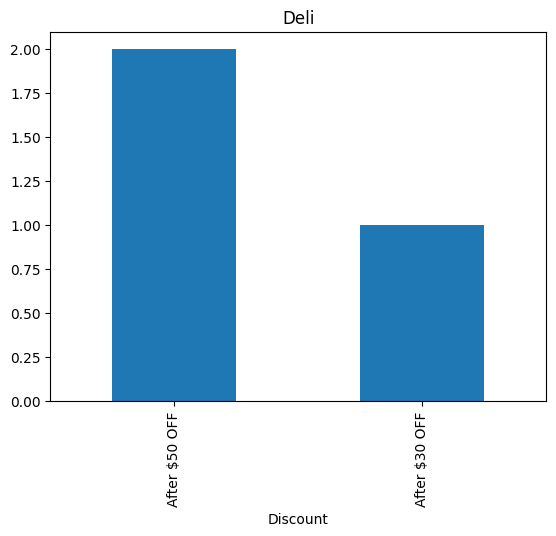

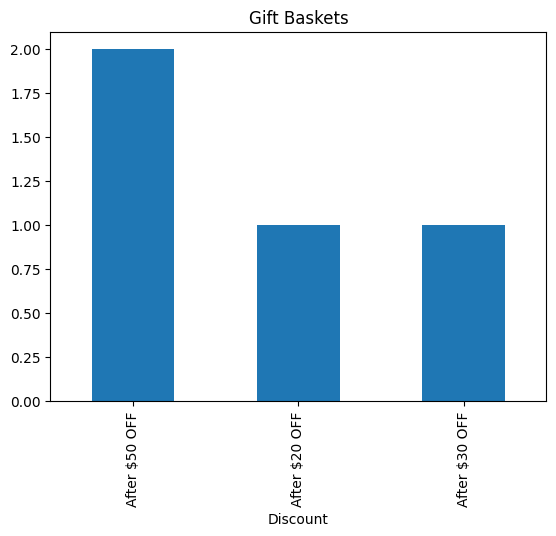

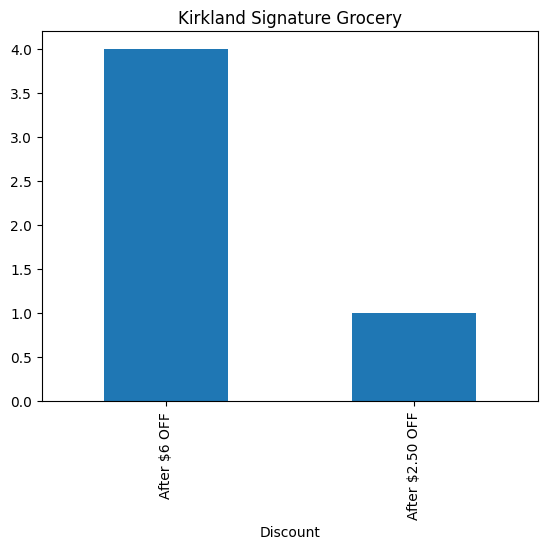

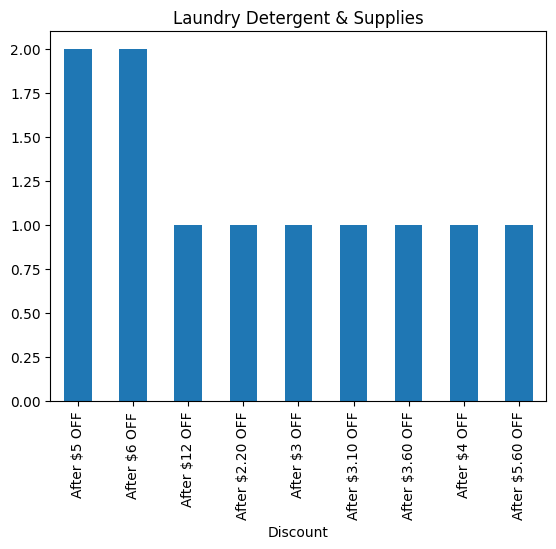

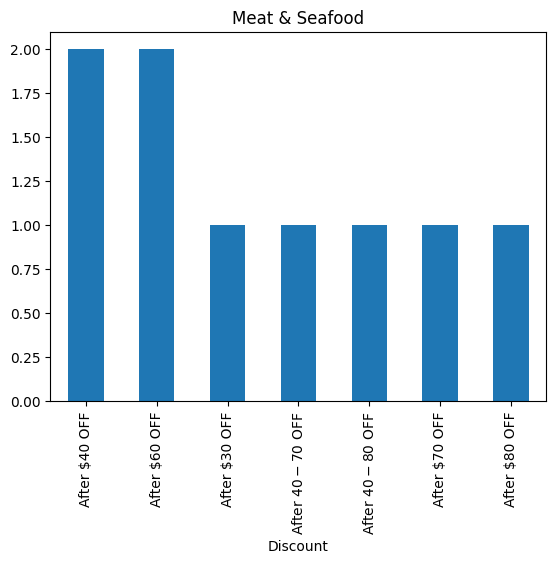

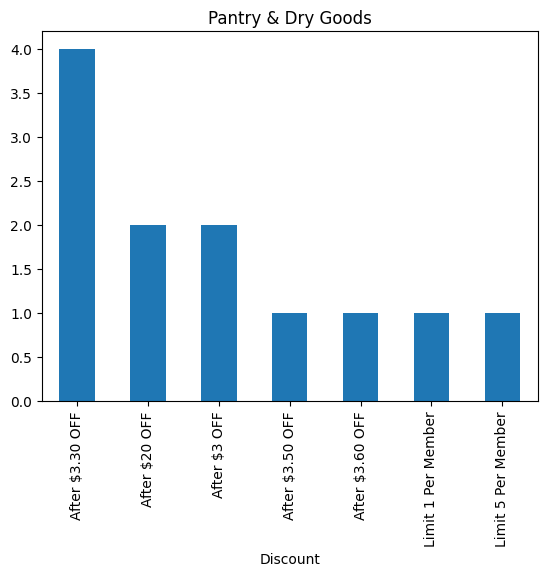

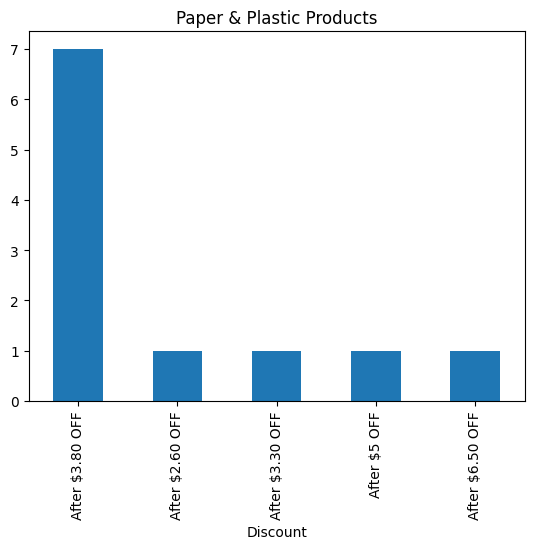

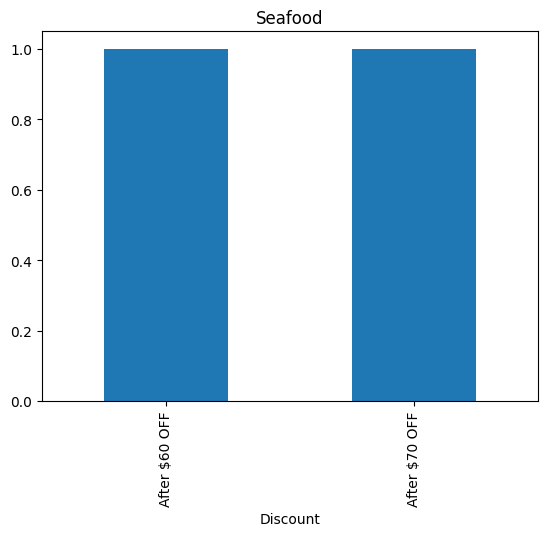

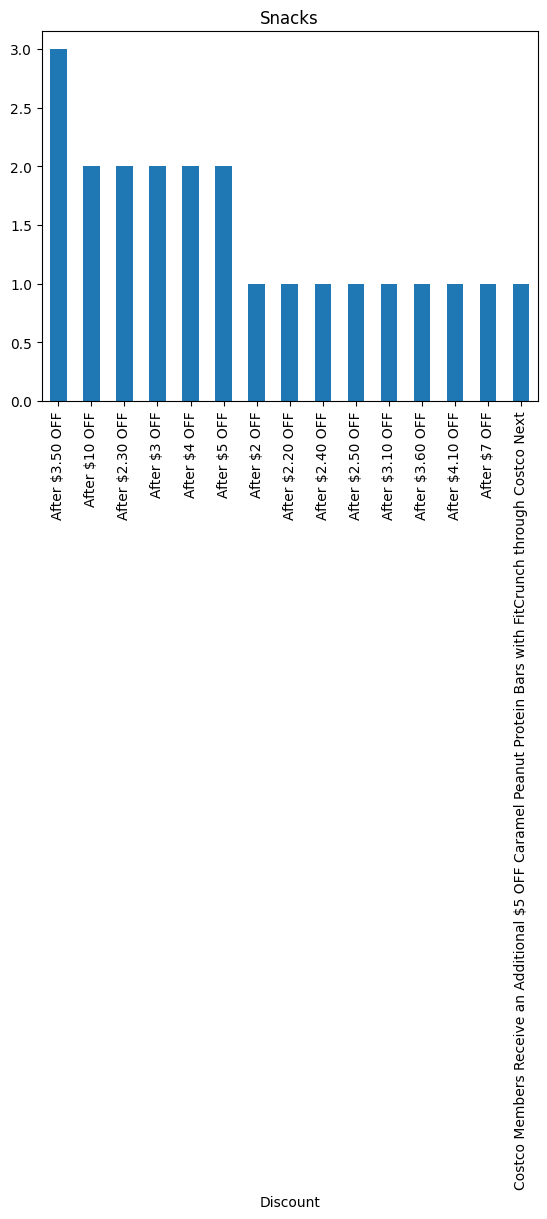

In [70]:
sub_categorys = df_discounted['Sub Category'].unique()
display(sub_categorys)
unique_discounts = df_discounted['Sub Category'].nunique()
for sub_category in sub_categorys:
    df_discounted_subset = df_discounted[df_discounted['Sub Category'] == sub_category]
    df_discounted_subset.groupby('Discount').size().sort_values(ascending=False).plot(kind='bar', title=sub_category)
    plt.show()


We conclude that the discounts tend to be higher in the subcategories with the most discounts, which is demonstrated by looking at the Snacks and Cleaning Supplies for instance.